#Comparison of video game sales and GDP per resident in the world

The topic of this paper is the impact of GDP on video game sales in certain parts of the world. Main
the idea is to monitor GDP growth or decline depending on the year and place of sale, and to conclude whether and how much it affects
GDP affects game sales. The main sales areas that will be studied are the North
America and Japan (there is also data for Europe, but Europe has too many countries to
could conclude something). The assumption is that GDP affects sales, which I will try to prove.
I will also conclude which are the most popular video game genres, platforms and publishers.

1. Collection of data sources

The data was collected through the following sources:

Video Game Sales: https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download

GDP by selected country: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm#indicator-chart

The first dataset was downloaded from the Kaggle site. There are exactly 16,598 games in this dataset.
The following information can be found for each game:
* Rank – the place of the game by the total number of sales. First place is the best-selling game
looking at total sales worldwide.
* Name – name of the game
* Platform – the game release platform
* Year – the year the game was released
* Genre – genre of the game
* Publisher – publishing house of the game
* NA_Sales – sales in North America (in millions)
* EU_Sales – sales in Europe (in millions)
* JP_Sales – sales in Japan (in millions)
* Other_sales – sales in other parts of the world (in millions)
* Global_sales – total sales in the world

Second dataset is available at data.oecd.org. On this page it is possible to select a range
the year in which I want to take over GDP. The oldest game from the first data set is from 1980, and the newest from
2010 (there are also more recent ones, but in too few numbers, so these games will not be taken into account). Cause of
for this reason I will choose the range of years from 1980 to 2010
The essential data from this set for analysis are:
* Location – abbreviation of the country
* Indicator – indication that it is GDP ("gross domestic product" in English, GDP)
* Measure – dollar per capita label
* Time - year
* Value – GDP value

## 2. Cleaning data

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
# reading first dataframe - vgsales.csv
df1 = pd.read_csv("/content/drive/MyDrive/vgsales.csv")

In [170]:
# reading second dataframe - DP_LIVE_01062022142735936.csv
df2 = pd.read_csv("/content/drive/MyDrive/DP_LIVE_01062022142735936.csv")

## Cleaning first dataframe

In [171]:
 # Checking how many games have values that are null
 df1.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

271 video games don't have a year record, so I'll discard those records (actually I'll take all values ​​where there are years)

In [172]:
# Creating new dataframe
df11 = df1[df1['Year'].notna()]

In [173]:
# Checking null values again
df11.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

There are 36 games left without a record of who is the publisher, but that is not the focus of this seminar, so I will keep those records

In [174]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Taking games from 1980 to 2010

In [175]:
df11['Year'] = df11['Year'].astype(int, errors = 'raise')

<ipython-input-175-e984808a3293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Year'] = df11['Year'].astype(int, errors = 'raise')


In [176]:
first_dataframe = df11[ (df11["Year"] > 1979) & (df11["Year"] < 2011) ]

# Cleaning second dataframe

In [177]:
df2

,"LOCATION,""INDICATOR"",""SUBJECT"",""MEASURE"",""FREQUENCY"",""TIME"",""Value"",""Flag Codes"""
0,"AUS,""GDP"",""TOT"",""USD_CAP"",""A"",""1980"",10470.286..."
1,"AUS,""GDP"",""TOT"",""USD_CAP"",""A"",""1981"",11947.245..."
2,"AUS,""GDP"",""TOT"",""USD_CAP"",""A"",""1982"",11981.66345,"
3,"AUS,""GDP"",""TOT"",""USD_CAP"",""A"",""1983"",12767.30554,"
4,"AUS,""GDP"",""TOT"",""USD_CAP"",""A"",""1984"",13593.136..."
...,...
1805,"SEN,""GDP"",""TOT"",""USD_CAP"",""A"",""2011"",2728.699987,"
1806,"SEN,""GDP"",""TOT"",""USD_CAP"",""A"",""2012"",2798.104708,"
1807,"SEN,""GDP"",""TOT"",""USD_CAP"",""A"",""2013"",2797.721619,"
1808,"SEN,""GDP"",""TOT"",""USD_CAP"",""A"",""2014"",2881.298928,"


In [178]:
for col in df2.columns:
    print(col)

LOCATION,"INDICATOR","SUBJECT","MEASURE","FREQUENCY","TIME","Value","Flag Codes"


Column division by commas

In [179]:
df2[['Location', 'Indicator', 'Subject', 'Measure', 'Frequency', 'Time', 'Value', 'Flag Codes']] = df2['LOCATION,"INDICATOR","SUBJECT","MEASURE","FREQUENCY","TIME","Value","Flag Codes"'].str.split(',', expand=True)

Deleting frist column

In [180]:
df22 = df2.drop('LOCATION,"INDICATOR","SUBJECT","MEASURE","FREQUENCY","TIME","Value","Flag Codes"', axis=1)

It is necessary to remove the quotation marks from the Time field, so that it can join the datasets by that field

In [181]:
df22 = df22.replace('"', '', regex=True)

In [182]:
df22['Time'] = df22['Time'].astype(int, errors = 'raise')

In [183]:
df22['Value'] = df22['Value'].astype(float, errors = 'raise')

In [184]:
df22

,Location,Indicator,Subject,Measure,Frequency,Time,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,1980,10470.286937,
1,AUS,GDP,TOT,USD_CAP,A,1981,11947.245259,
2,AUS,GDP,TOT,USD_CAP,A,1982,11981.663450,
3,AUS,GDP,TOT,USD_CAP,A,1983,12767.305540,
4,AUS,GDP,TOT,USD_CAP,A,1984,13593.136482,
...,...,...,...,...,...,...,...,...
1805,SEN,GDP,TOT,USD_CAP,A,2011,2728.699987,
1806,SEN,GDP,TOT,USD_CAP,A,2012,2798.104708,
1807,SEN,GDP,TOT,USD_CAP,A,2013,2797.721619,
1808,SEN,GDP,TOT,USD_CAP,A,2014,2881.298928,


In [185]:
df22.rename(columns = {'Time':'Year'}, inplace = True)

At the center of the research are North America (I will take the 3 largest countries; USA, Canada and Mexico) and Japan

In [186]:
df22 = df22[ (df22["Location"] == "MEX") | (df22["Location"] == "USA")  | (df22["Location"] == "CAN" ) | (df22["Location"] == "JPN")]

I leave the location, time and GDP value

In [187]:
second_dataframe = df22.drop(['Indicator', 'Subject', 'Measure', 'Frequency', 'Flag Codes'], axis = 1)

In [188]:
second_dataframeJPN = second_dataframe[ second_dataframe["Location"] == "JPN"]

In [189]:
second_dataframeCAN = second_dataframe[ second_dataframe["Location"] == "CAN"]

In [190]:
second_dataframeUSA = second_dataframe[ second_dataframe["Location"] == "USA"]

In [191]:
second_dataframeMEX = second_dataframe[ second_dataframe["Location"] == "MEX"]

# Merging all dataframes

Adding Canada's GDP

In [192]:
first_dataframe = first_dataframe.merge(second_dataframeCAN, on = "Year")

In [193]:
first_dataframe = first_dataframe.drop(['Location'], axis = 1)

In [194]:
first_dataframe.rename(columns = {'Value':'GDP_Japan'}, inplace = True)

In [195]:
first_dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,GDP_Japan
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,38120.176792
1,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,38120.176792
2,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,38120.176792
3,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,38120.176792
4,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,38120.176792
...,...,...,...,...,...,...,...,...,...,...,...,...
12436,4782,Pengo,2600,1983,Adventure,Atari,0.38,0.02,0.00,0.00,0.40,14034.005498
12437,5384,Frostbite,2600,1983,Action,Activision,0.32,0.02,0.00,0.00,0.34,14034.005498
12438,5561,Frogger II: Threeedeep!,2600,1983,Action,Parker Bros.,0.31,0.02,0.00,0.00,0.33,14034.005498
12439,6009,Dolphin,2600,1983,Action,Activision,0.27,0.02,0.00,0.00,0.29,14034.005498


Adding Japan's GDP

In [196]:
first_dataframe = first_dataframe.merge(second_dataframeJPN, on = "Year")

In [197]:
first_dataframe = first_dataframe.drop(['Location'], axis = 1)

In [198]:
first_dataframe.rename(columns = {'Value':'GDP_Canada'}, inplace = True)

Adding USA's GDP

In [199]:
first_dataframe = first_dataframe.merge(second_dataframeUSA, on = "Year")

In [200]:
first_dataframe = first_dataframe.drop(['Location'], axis = 1)

In [201]:
first_dataframe.rename(columns = {'Value':'GDP_USA'}, inplace = True)

Adding Mexico's GDP

In [202]:
first_dataframe = first_dataframe.merge(second_dataframeMEX, on = "Year")

In [203]:
first_dataframe = first_dataframe.drop(['Location'], axis = 1)

In [204]:
first_dataframe.rename(columns = {'Value':'GDP_Mexico'}, inplace = True)

In [205]:
Merged_dataframe = first_dataframe

In [206]:
Merged_dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,GDP_Japan,GDP_Canada,GDP_USA,GDP_Mexico
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,38120.176792,33638.841255,46234.105710,13725.383603
1,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,38120.176792,33638.841255,46234.105710,13725.383603
2,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,38120.176792,33638.841255,46234.105710,13725.383603
3,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,38120.176792,33638.841255,46234.105710,13725.383603
4,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,38120.176792,33638.841255,46234.105710,13725.383603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,4782,Pengo,2600,1983,Adventure,Atari,0.38,0.02,0.00,0.00,0.40,14034.005498,12098.354701,15508.007835,5757.163420
12437,5384,Frostbite,2600,1983,Action,Activision,0.32,0.02,0.00,0.00,0.34,14034.005498,12098.354701,15508.007835,5757.163420
12438,5561,Frogger II: Threeedeep!,2600,1983,Action,Parker Bros.,0.31,0.02,0.00,0.00,0.33,14034.005498,12098.354701,15508.007835,5757.163420
12439,6009,Dolphin,2600,1983,Action,Activision,0.27,0.02,0.00,0.00,0.29,14034.005498,12098.354701,15508.007835,5757.163420


Visualisations


The amount of games under the dataset, the games are relatively well balanced

Text(0.5, 1.0, 'Amount of games by platform')

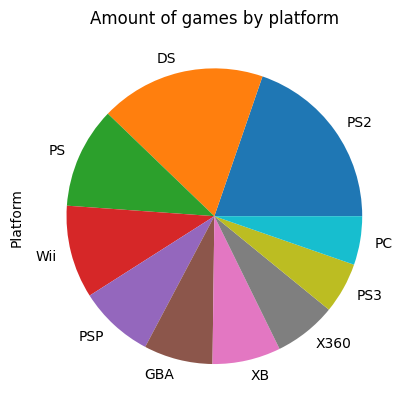

In [207]:
sumByPlatform = Merged_dataframe.groupby(["Platform"], sort=True).count()
top10 = sumByPlatform.sort_values("Rank",  ascending= False).head(10)
top10.iloc[:,1].plot.pie(subplots= True)
plt.ylabel("Platform")
plt.title("Amount of games by platform")


1. Top 10 most sold games

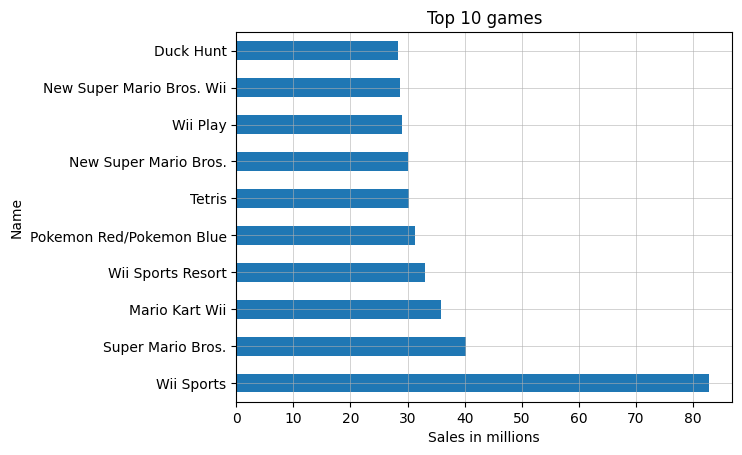

In [208]:
maxbyPlatform = Merged_dataframe.groupby(["Name"], sort=False)['Global_Sales'].max()
sortedMax = maxbyPlatform.sort_values(ascending = False)
top10 = sortedMax.head(10)
top10.plot.barh();
plt.title("Top 10 games")
plt.ylabel("Name")
plt.xlabel("Sales in millions")
plt.grid(linewidth = 0.4)

Most sold game is Wii Sports

2. Most popular platforms

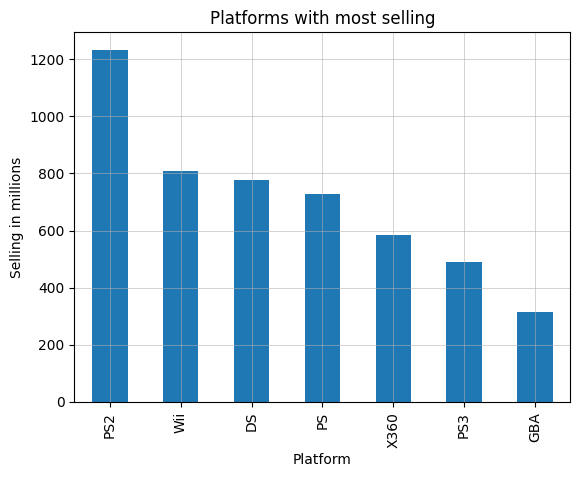

In [209]:
sumPlatforms = Merged_dataframe.groupby(["Platform"], sort=False)['Global_Sales'].sum()
sortedSum = sumPlatforms.sort_values(ascending = False)
sorted7 = sortedSum.head(7)
sorted7.plot.bar()
plt.title("Platforms with most selling")
plt.ylabel("Selling in millions")
plt.xlabel("Platform")
plt.grid(linewidth = 0.4)


The best selling games are Playstation 2 games with even more than 1200 million in total sales.

3. Most popular genres

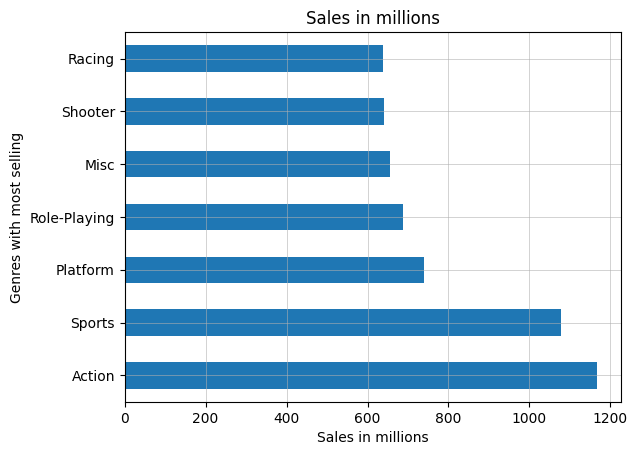

In [210]:
sumaGenre = Merged_dataframe.groupby(["Genre"], sort=False)['Global_Sales'].sum()
sortedGenre = sumaGenre.sort_values(ascending = False)
sorted7 = sortedGenre.head(7)
sorted7.plot.barh()
plt.title("Sales in millions")
plt.ylabel("Genres with most selling")
plt.xlabel("Sales in millions")
plt.grid(linewidth = 0.4)

Action games are by far the best sellers, followed by sports games and platformers

4. Top 10 publishers in the world

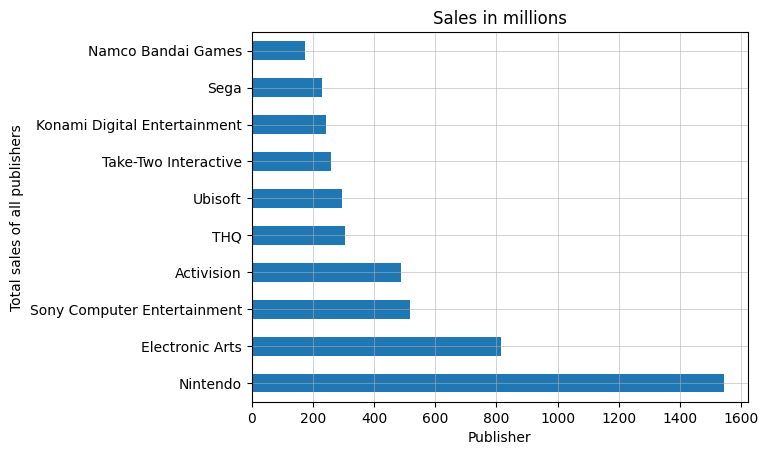

In [211]:
sumPublisher = Merged_dataframe.groupby(["Publisher"], sort=False)['Global_Sales'].sum()
sortedPublisher = sumPublisher.sort_values(ascending = False)
sorted10 = sortedPublisher.head(10)
sorted10.plot.barh()
plt.title("Sales in millions")
plt.ylabel("Total sales of all publishers")
plt.xlabel("Publisher")
plt.grid(linewidth = 0.4)


Nintendo leads convincingly.

5. Comparison of sales in North America and Japan by year

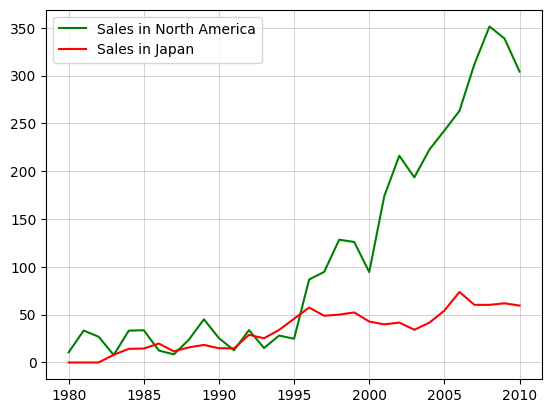

In [212]:
salesNA = Merged_dataframe.groupby(["Year"], sort = True)['NA_Sales'].sum()
salesJAP = Merged_dataframe.groupby(["Year"], sort = True)['JP_Sales'].sum()

fig, ax = plt.subplots()

ax.plot(salesNA, color = 'green', label = "Sales in North America")
ax.plot(salesJAP, color = 'red', label = "Sales in Japan")
ax.legend(loc = 'upper left')
plt.grid(linewidth = 0.4)
plt.show()

Visible decline after 2007, especially in North America, in Japan there is no visible decline, but there is no increase either.

6.  Comparison of GDP of all analyzed countries

In [213]:
GDP_byYearJapan = Merged_dataframe.groupby(["Year"], sort = True)['GDP_Japan'].max()
GDP_byYearUSA = Merged_dataframe.groupby(["Year"], sort = True)['GDP_USA'].max()
GDP_byYearCanada = Merged_dataframe.groupby(["Year"], sort = True)['GDP_Canada'].max()
GDP_byYearMexico = Merged_dataframe.groupby(["Year"], sort = True)['GDP_Mexico'].max()


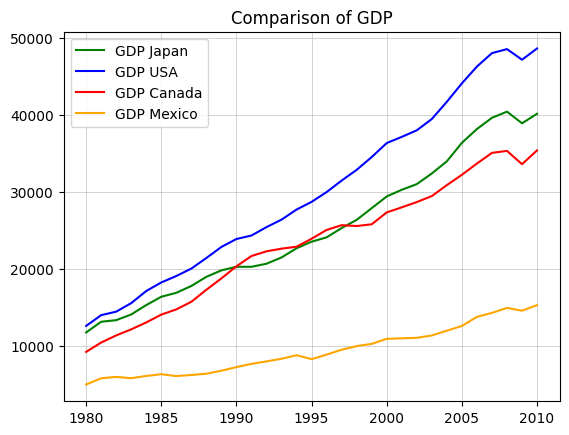

In [214]:
fig, ax = plt.subplots()

ax.plot(GDP_byYearJapan, color = 'green', label = "GDP Japan")
ax.plot(GDP_byYearUSA, color = 'blue', label = "GDP USA")
ax.plot(GDP_byYearCanada, color = 'red', label = "GDP Canada")
ax.plot(GDP_byYearMexico, color = 'orange', label = "GDP Mexico")
ax.legend(loc = 'upper left')
plt.title("Comparison of GDP")
plt.grid(linewidth = 0.4)
plt.show()

Also a visible decline after ~ 2007. Assumption - World financial crisis after 2007

7. How much did the crisis affect sales in Europe?

In [215]:
salesEU = Merged_dataframe.groupby(["Year"], sort = True)['EU_Sales'].sum()

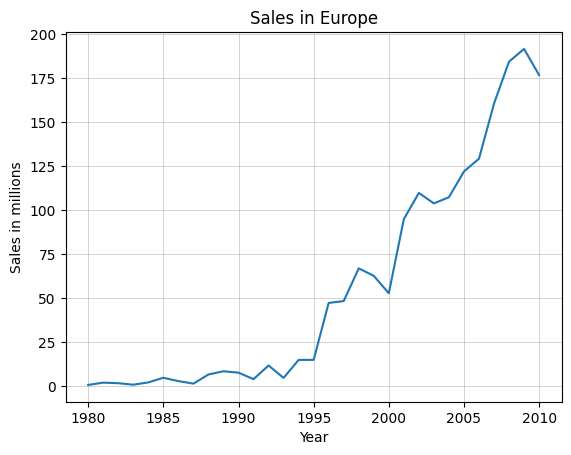

In [216]:
salesEU.plot()
plt.ylabel("Sales in millions")
plt.xlabel("Year")
plt.title("Sales in Europe")
plt.grid(linewidth = 0.4)

A slight decline is visible after 2009


8. Comparison of Europe with North America and Japan

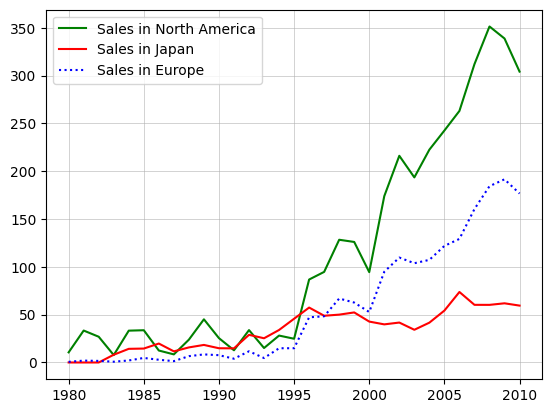

In [217]:
fig, ax = plt.subplots()

ax.plot(salesNA, color = 'green', label = "Sales in North America")
ax.plot(salesJAP, color = 'red', label = "Sales in Japan")
ax.plot(salesEU, color = 'blue', label = "Sales in Europe", linestyle = ":")
ax.legend(loc = 'upper left')
plt.grid(linewidth = 0.4)
plt.show()

By far the most games were sold in North America, almost twice as much in Europe and the least in Japan

9. How does the rest of the world compare to the 3 main areas?

In [218]:
salesRest = Merged_dataframe.groupby(["Year"], sort = True)['Other_Sales'].sum()

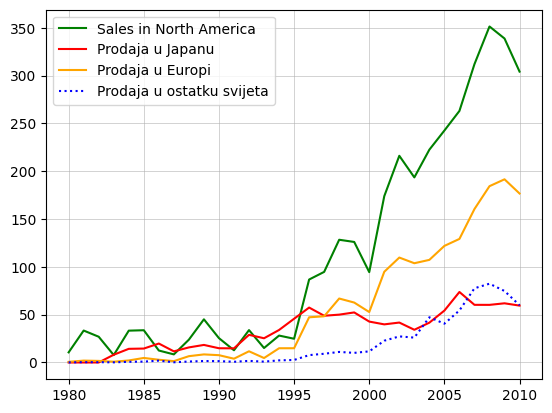

In [219]:
fig, ax = plt.subplots()

ax.plot(salesNA, color = 'green', label = "Sales in North America")
ax.plot(salesJAP, color = 'red', label = "Prodaja u Japanu")
ax.plot(salesEU, color = 'orange', label = "Prodaja u Europi")
ax.plot(salesRest, color = "blue", label ="Prodaja u ostatku svijeta", linestyle = ":")
ax.legend(loc = 'upper left')
plt.grid(linewidth = 0.4)
plt.show()

Until 1995 it was almost negligible, after 2005 it was even higher than in Japan